## Are rents in NYC going to drop anytime soon?

### Import libraries and files

In [1]:
# Import libraries
import pandas as pd
from prophet import Prophet
from IPython.display import clear_output

In [2]:
# Read rental data from Street Easy
df = pd.read_csv('https://cdn-charts.streeteasy.com/rentals/OneBd/medianAskingRent_OneBd.zip',compression='zip')
df.head(10)

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,Manhattan,submarket,2995.0,2950.0,2900.0,2975.0,2995.0,3000.0,3000.0,...,4670.0,4500.0,4500.0,4550.0,4500.0,4500.0,4600.0,4730.0,4750.0,4705.0
1,All Midtown,Manhattan,submarket,2800.0,2800.0,2850.0,2895.0,2900.0,2970.0,3000.0,...,4490.0,4400.0,4391.0,4329.0,4210.0,4173.0,4210.0,4300.0,4308.0,4395.0
2,All Upper East Side,Manhattan,submarket,2350.0,2300.0,2350.0,2470.0,2500.0,2500.0,2500.0,...,3650.0,3500.0,3500.0,3500.0,3550.0,3600.0,3585.0,3600.0,3795.0,3695.0
3,All Upper Manhattan,Manhattan,submarket,1500.0,1516.0,1545.0,1516.0,1550.0,1575.0,1550.0,...,2495.0,2450.0,2475.0,2450.0,2400.0,2400.0,2400.0,2450.0,2495.0,2500.0
4,All Upper West Side,Manhattan,submarket,2600.0,2565.0,2495.0,2500.0,2500.0,2600.0,2600.0,...,4000.0,4100.0,4100.0,4124.0,4095.0,4000.0,3995.0,4000.0,4198.0,4200.0
5,Astoria,Queens,neighborhood,1395.0,1450.0,1450.0,1395.0,1400.0,1550.0,1475.0,...,2450.0,2450.0,2495.0,2495.0,2400.0,2400.0,2400.0,2463.0,2500.0,2500.0
6,Auburndale,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bath Beach,Brooklyn,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1750.0,NaN,NaN,1700.0,NaN,NaN,1850.0,1800.0,1995.0
8,Battery Park City,Manhattan,neighborhood,2875.0,2800.0,2900.0,2873.0,2800.0,2900.0,2950.0,...,4895.0,4895.0,4868.0,4730.0,4515.0,4425.0,4325.0,4320.0,4355.0,4545.0
9,Bay Ridge,Brooklyn,neighborhood,1350.0,1350.0,1350.0,1325.0,1300.0,1300.0,1300.0,...,1900.0,1950.0,1999.0,2000.0,1900.0,1900.0,1913.0,1950.0,2039.0,1985.0


### User Input - Choose Borough and Area

In [3]:
# Create a list of boroughs
boroughs = df['Borough'].dropna().unique().tolist()
# Create an empty list to hold the selected areas and selected boroughs
selected_areas = []
selected_boroughs = []

# loop till the user chooses to not enter a new area
while True:
    try:
        # Print the selected areas with their boroughs
        if len(selected_areas) > 0:
            print('You have selected the following areas:')
            print(*selected_areas,sep=', ')
            print('\n')
            
        # Print the boroughs in the list
        for i,borough in enumerate(boroughs):
            print(f'{i+1}. {borough}')
            
        # Ask the user to choose from a borough
        borough_input = int(input('\nPlease select a Borough from the list (-1 to exit): '))
        
        # Break in case if the user enters -1
        if(borough_input == -1):
            break
        
        # Create a list of boroughs based on the borough selected by the user
        areas = df.loc[df['Borough'] == boroughs[borough_input-1], 'areaName'].tolist()
        
        # Print the areas in the list
        for i,area in enumerate(areas):
            print(f'{i+1}. {area}')
            
        # Ask the user to choose from an area
        area_input = int(input('\nPlease select an Area from the list: '))
        
        # Add the selected area and borough to a list
        selected_boroughs.append(boroughs[borough_input-1])
        selected_areas.append(areas[area_input-1])
        
        # Clear the output
        clear_output()
        
    except:
        # Print an exception in case if the user provides an invalid output
        print('Invalid input! ')

You have selected the following areas:
All Downtown, All Midtown, Queens, Williamsburg, Bronx, Manhattan


1. Manhattan
2. Queens
3. Brooklyn
4. Bronx
5. Staten Island

Please select a Borough from the list (-1 to exit): -1


In [4]:
# Print the final list of areas and boroughs
for i in range(len(selected_boroughs)):
    print(f'{selected_boroughs[i]}-{selected_areas[i]}')

Manhattan-All Downtown
Manhattan-All Midtown
Queens-Queens
Brooklyn-Williamsburg
Bronx-Bronx
Manhattan-Manhattan


### Filter and clean data

In [5]:
# Create a new dataframe to data of the areas selected
df_nyc = pd.DataFrame()
# Add the data to the dataframe
for i in range(len(selected_boroughs)):
    df_nyc = pd.concat([df_nyc,
                             df.loc[(df['Borough'] == selected_boroughs[i]) & 
                                    (df['areaName'] == selected_areas[i])]])
# Reset index and display dataframe
df_nyc

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,Manhattan,submarket,2995.0,2950.0,2900.0,2975.0,2995.0,3000.0,3000.0,...,4670.0,4500.0,4500.0,4550.0,4500.0,4500.0,4600.0,4730.0,4750.0,4705.0
1,All Midtown,Manhattan,submarket,2800.0,2800.0,2850.0,2895.0,2900.0,2970.0,3000.0,...,4490.0,4400.0,4391.0,4329.0,4210.0,4173.0,4210.0,4300.0,4308.0,4395.0
150,Queens,Queens,borough,1405.0,1450.0,1500.0,1500.0,1378.0,1375.0,1400.0,...,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2495.0,2500.0,2550.0
192,Williamsburg,Brooklyn,neighborhood,2383.0,2350.0,2304.0,2450.0,2450.0,2585.0,2558.0,...,4200.0,4099.0,4110.0,4099.0,4190.0,4000.0,3990.0,3995.0,4100.0,4000.0
22,Bronx,Bronx,borough,1350.0,1400.0,1400.0,1375.0,1400.0,1300.0,1200.0,...,2300.0,2150.0,2275.0,2350.0,2200.0,2200.0,2150.0,2200.0,2250.0,2254.0
108,Manhattan,Manhattan,borough,2675.0,2650.0,2600.0,2700.0,2700.0,2750.0,2800.0,...,4195.0,4100.0,4050.0,4000.0,3995.0,3950.0,4000.0,4100.0,4200.0,4210.0


In [6]:
# Drop unwanted columns
df_nyc.drop(['Borough', 'areaType'], axis=1, inplace=True)
df_nyc

,areaName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
0,All Downtown,2995.0,2950.0,2900.0,2975.0,2995.0,3000.0,3000.0,3000.0,3200.0,...,4670.0,4500.0,4500.0,4550.0,4500.0,4500.0,4600.0,4730.0,4750.0,4705.0
1,All Midtown,2800.0,2800.0,2850.0,2895.0,2900.0,2970.0,3000.0,3012.0,3095.0,...,4490.0,4400.0,4391.0,4329.0,4210.0,4173.0,4210.0,4300.0,4308.0,4395.0
150,Queens,1405.0,1450.0,1500.0,1500.0,1378.0,1375.0,1400.0,1400.0,1400.0,...,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2495.0,2500.0,2550.0
192,Williamsburg,2383.0,2350.0,2304.0,2450.0,2450.0,2585.0,2558.0,2500.0,2550.0,...,4200.0,4099.0,4110.0,4099.0,4190.0,4000.0,3990.0,3995.0,4100.0,4000.0
22,Bronx,1350.0,1400.0,1400.0,1375.0,1400.0,1300.0,1200.0,1175.0,1250.0,...,2300.0,2150.0,2275.0,2350.0,2200.0,2200.0,2150.0,2200.0,2250.0,2254.0
108,Manhattan,2675.0,2650.0,2600.0,2700.0,2700.0,2750.0,2800.0,2800.0,2873.0,...,4195.0,4100.0,4050.0,4000.0,3995.0,3950.0,4000.0,4100.0,4200.0,4210.0


In [7]:
# Set index to areaName
df_nyc.set_index('areaName', inplace=True)
df_nyc

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03
areaName,,,,,,,,,,,,,,,,,,,,,
All Downtown,2995.0,2950.0,2900.0,2975.0,2995.0,3000.0,3000.0,3000.0,3200.0,3200.0,...,4670.0,4500.0,4500.0,4550.0,4500.0,4500.0,4600.0,4730.0,4750.0,4705.0
All Midtown,2800.0,2800.0,2850.0,2895.0,2900.0,2970.0,3000.0,3012.0,3095.0,3017.0,...,4490.0,4400.0,4391.0,4329.0,4210.0,4173.0,4210.0,4300.0,4308.0,4395.0
Queens,1405.0,1450.0,1500.0,1500.0,1378.0,1375.0,1400.0,1400.0,1400.0,1400.0,...,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2495.0,2500.0,2550.0
Williamsburg,2383.0,2350.0,2304.0,2450.0,2450.0,2585.0,2558.0,2500.0,2550.0,2558.0,...,4200.0,4099.0,4110.0,4099.0,4190.0,4000.0,3990.0,3995.0,4100.0,4000.0
Bronx,1350.0,1400.0,1400.0,1375.0,1400.0,1300.0,1200.0,1175.0,1250.0,1275.0,...,2300.0,2150.0,2275.0,2350.0,2200.0,2200.0,2150.0,2200.0,2250.0,2254.0
Manhattan,2675.0,2650.0,2600.0,2700.0,2700.0,2750.0,2800.0,2800.0,2873.0,2850.0,...,4195.0,4100.0,4050.0,4000.0,3995.0,3950.0,4000.0,4100.0,4200.0,4210.0


In [8]:
# Transpose the dataframe to move the dates to the index and rename the index to 'Date'
df_nyc = df_nyc.transpose().rename_axis('', axis=1)
df_nyc.tail()

,All Downtown,All Midtown,Queens,Williamsburg,Bronx,Manhattan
2023-11,4500.0,4173.0,2500.0,4000.0,2200.0,3950.0
2023-12,4600.0,4210.0,2500.0,3990.0,2150.0,4000.0
2024-01,4730.0,4300.0,2495.0,3995.0,2200.0,4100.0
2024-02,4750.0,4308.0,2500.0,4100.0,2250.0,4200.0
2024-03,4705.0,4395.0,2550.0,4000.0,2254.0,4210.0


In [9]:
# Check the datatype of the index
df_nyc.index.dtype

dtype('O')

In [10]:
# Change the datatype of the index to datetime
df_nyc.index = pd.to_datetime(df_nyc.index)
df_nyc.index.dtype

dtype('<M8[ns]')

In [11]:
# Check null values
df_nyc.isnull().sum()


All Downtown    0
All Midtown     0
Queens          0
Williamsburg    0
Bronx           0
Manhattan       0
dtype: int64

In [12]:
# Group by year and quarter
df_year_quarter = df_nyc\
                    .groupby([df_nyc.index.year, df_nyc.index.quarter])\
                    .mean()
df_year_quarter.tail(10)

All Downtown  All Midtown       Queens  Williamsburg        Bronx  \
2021 4   4234.666667  3986.000000  1950.000000   3433.333333  1733.333333   
2022 1   4486.000000  4221.666667  1986.666667   3655.333333  1770.666667   
     2   4528.333333  4341.666667  2100.000000   3852.666667  1846.000000   
     3   4500.000000  4270.000000  2275.333333   3974.333333  1890.000000   
     4   4498.333333  4190.000000  2300.000000   3939.000000  1850.000000   
2023 1   4548.333333  4301.666667  2298.333333   4181.666667  1916.666667   
     2   4671.666667  4467.000000  2466.666667   4100.000000  2116.000000   
     3   4516.666667  4373.333333  2500.000000   4102.666667  2258.333333   
     4   4533.333333  4197.666667  2500.000000   4060.000000  2183.333333   
2024 1   4728.333333  4334.333333  2515.000000   4031.666667  2234.666667   

          Manhattan  
2021 4  3416.666667  
2022 1  3815.000000  
     2  3964.666667  
     3  3958.000000  
     4  3971.666667  
2023 1  4108.333333  
     2  4223.333333  
     3  4050.000000  
     4  3981.666667  
2024 1  4170.000000

### Plot Data to visualize trends

<Axes: >

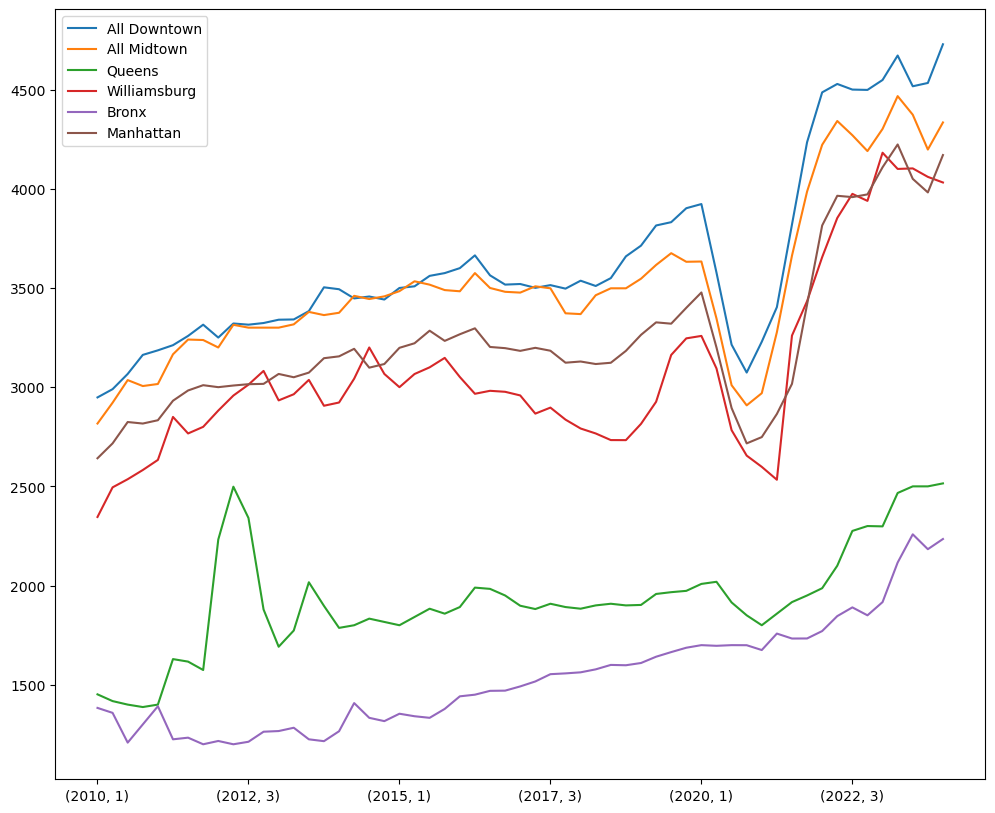

In [13]:
# Plot the data for columns with 'All' in them
df_year_quarter.plot(figsize=(12,10))

<Axes: >

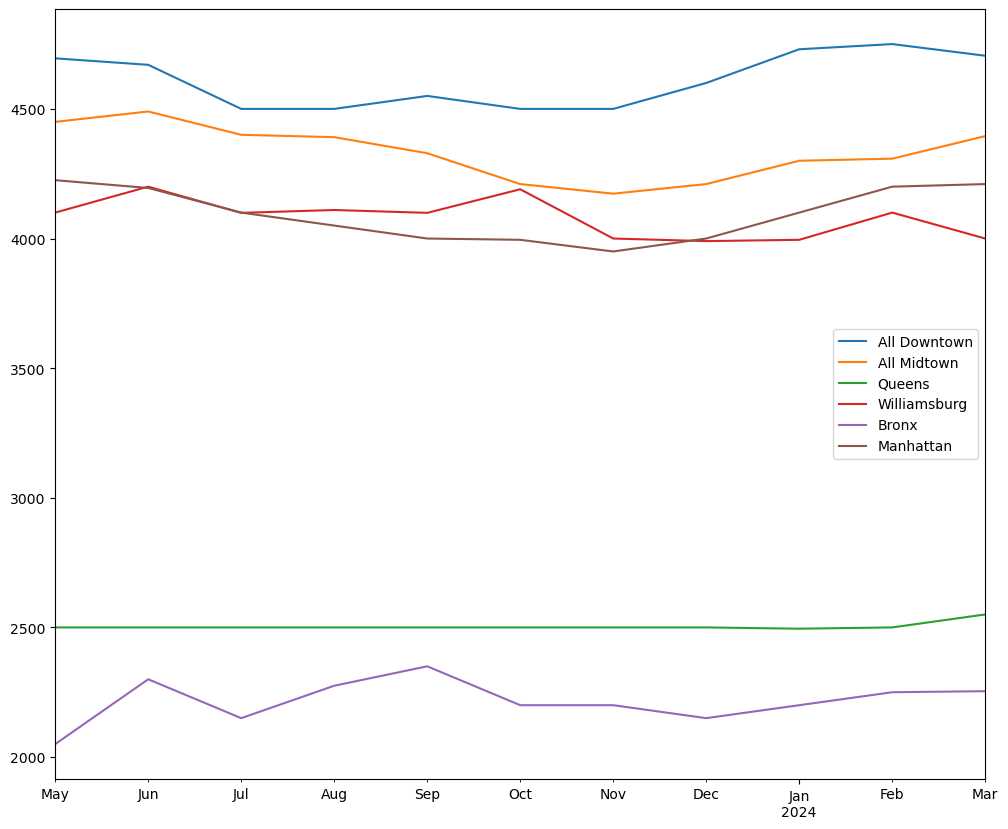

In [14]:
# Plot the data for the last one year
df_nyc.loc['2023-May':'2024'].plot(figsize=(12,10))

### Prepare the dataframes for Prophet

In [15]:
df_nyc.reset_index(inplace=True)
df_nyc.head()

,index,All Downtown,All Midtown,Queens,Williamsburg,Bronx,Manhattan
0,2010-01-01,2995.0,2800.0,1405.0,2383.0,1350.0,2675.0
1,2010-02-01,2950.0,2800.0,1450.0,2350.0,1400.0,2650.0
2,2010-03-01,2900.0,2850.0,1500.0,2304.0,1400.0,2600.0
3,2010-04-01,2975.0,2895.0,1500.0,2450.0,1375.0,2700.0
4,2010-05-01,2995.0,2900.0,1378.0,2450.0,1400.0,2700.0


In [16]:
df_nyc.shape

(171, 7)

In [17]:
# Create a list of dataframes for Prophet
list_df = []

for i in range(df_nyc.shape[1]-1):
    temp_df = df_nyc.iloc[:,[0,i+1]].copy()
    temp_df.columns = ['ds', 'y']
    list_df.append(temp_df)

# Check any one of the dataframes in the list
list_df[0].head()

,ds,y
0,2010-01-01,2995.0
1,2010-02-01,2950.0
2,2010-03-01,2900.0
3,2010-04-01,2975.0
4,2010-05-01,2995.0


### Use Prophet to predict values

In [18]:
# Create a list to hold the Prophet models
m = [Prophet() for _ in range(len(list_df))]

In [19]:
# Fit the Prophet model
for i in range(len(list_df)):
    m[i].fit(list_df[i])

20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:41 - cmdstanpy - INFO - Chain [1] done processing
20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:41 - cmdstanpy - INFO - Chain [1] done processing
20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:41 - cmdstanpy - INFO - Chain [1] done processing
20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:41 - cmdstanpy - INFO - Chain [1] done processing
20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:41 - cmdstanpy - INFO - Chain [1] done processing
20:33:41 - cmdstanpy - INFO - Chain [1] start processing
20:33:41 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# Forecast for one year of monthly trends
future = [m[i].make_future_dataframe(periods=12, freq='M') for i in range(len(list_df))]
    
# Check any one of the dataframes in the list
future[i].tail()

,ds
178,2024-10-31
179,2024-11-30
180,2024-12-31
181,2025-01-31
182,2025-02-28


In [21]:
# Make predictions using the dataframe
forecast = [m[i].predict(future[i]) for i in range(len(list_df))]

forecast[i].tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
178,2024-10-31,4620.737602,4350.745740,4754.751182,4608.056604,4633.049229,-74.008443,-74.008443,-74.008443,-74.008443,-74.008443,-74.008443,0.0,0.0,0.0,4546.729158
179,2024-11-30,4652.584896,4384.006098,4794.780733,4636.745350,4667.843277,-50.818590,-50.818590,-50.818590,-50.818590,-50.818590,-50.818590,0.0,0.0,0.0,4601.766306
180,2024-12-31,4685.493767,4518.990826,4915.947385,4667.197038,4704.012083,33.091313,33.091313,33.091313,33.091313,33.091313,33.091313,0.0,0.0,0.0,4718.585080
181,2025-01-31,4718.402638,4567.979398,4965.396773,4696.994029,4740.303627,47.097486,47.097486,47.097486,47.097486,47.097486,47.097486,0.0,0.0,0.0,4765.500125
182,2025-02-28,4748.126780,4483.757069,4896.485710,4723.915351,4772.974245,-59.741992,-59.741992,-59.741992,-59.741992,-59.741992,-59.741992,0.0,0.0,0.0,4688.384788


Manhattan-All Downtown


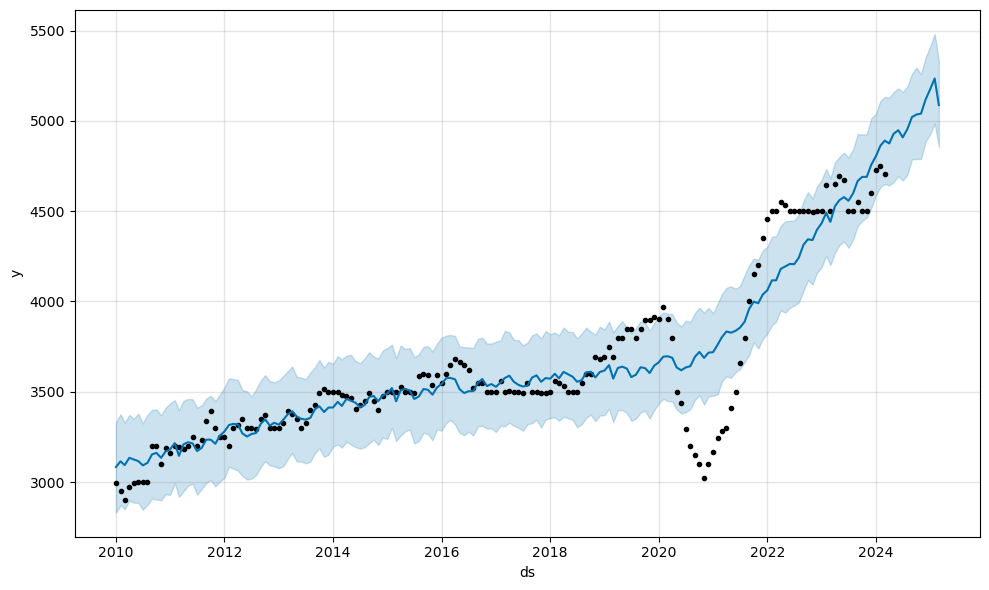

Manhattan-All Midtown


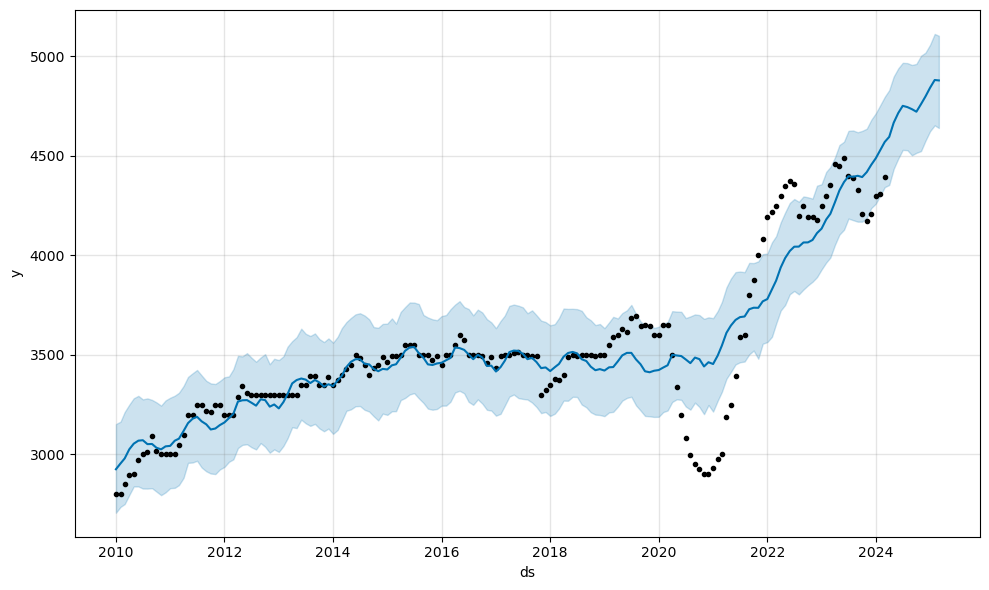

Queens-Queens


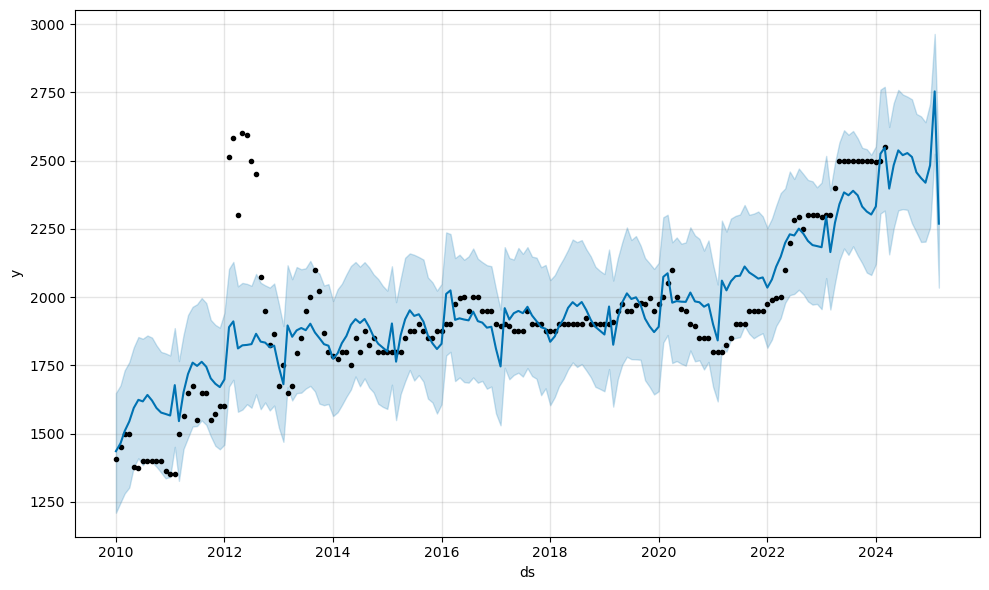

Brooklyn-Williamsburg


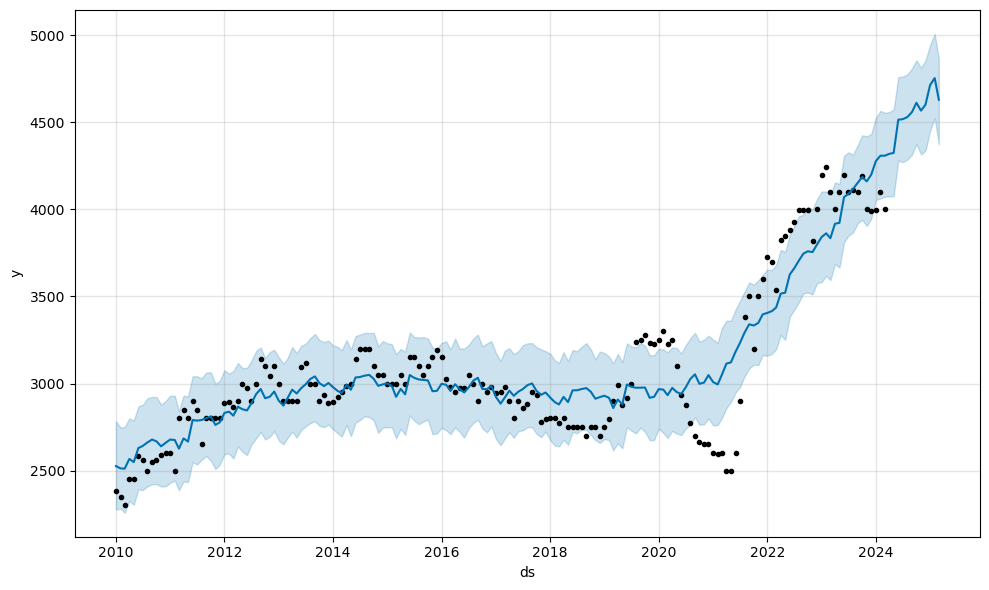

Bronx-Bronx


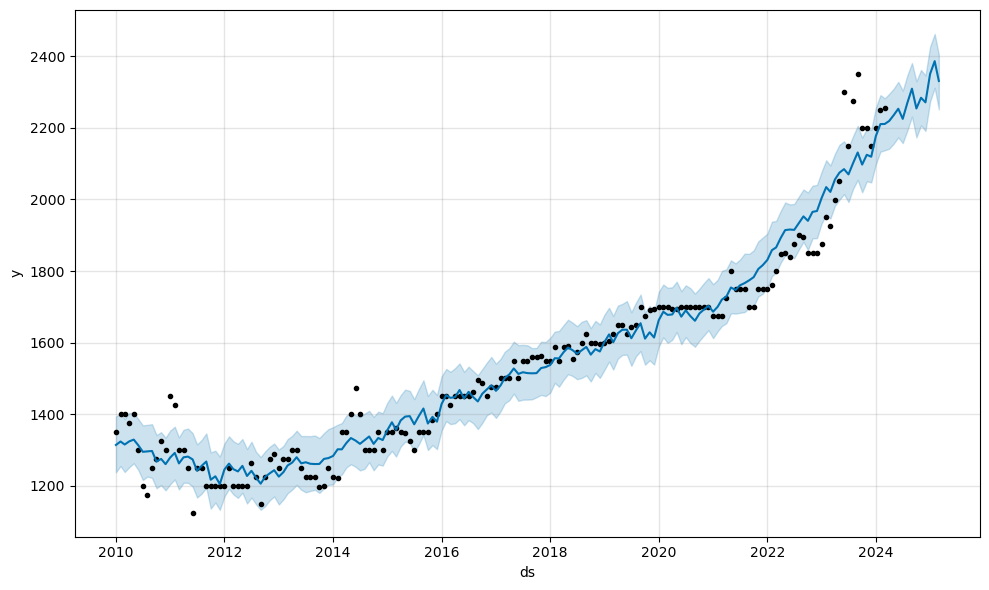

Manhattan-Manhattan


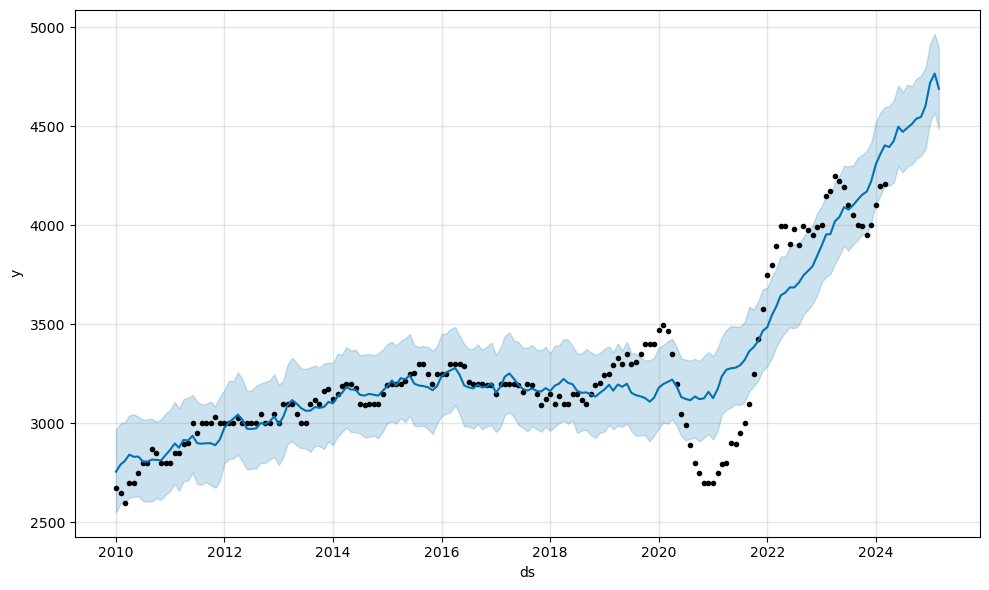

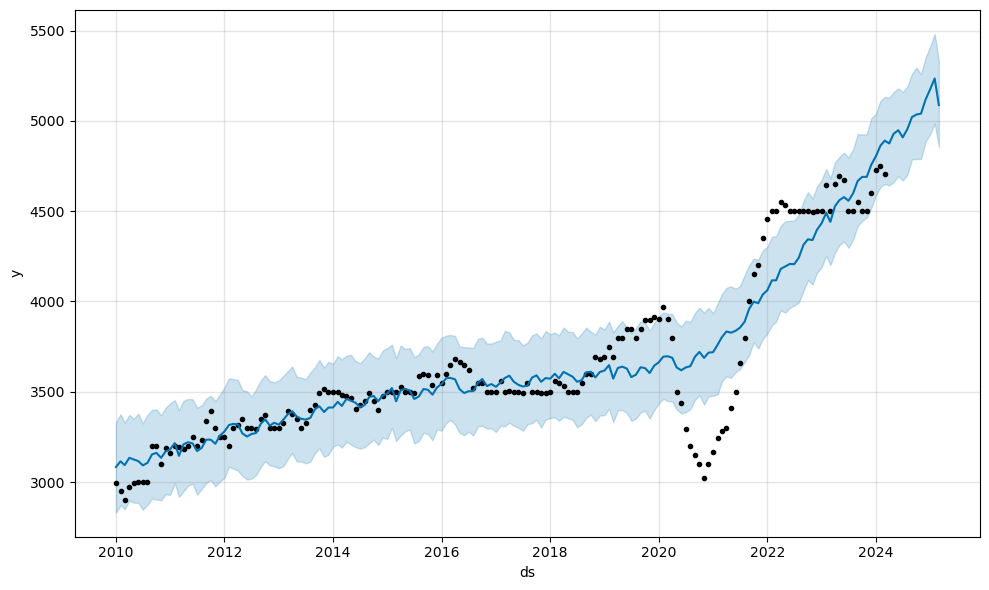

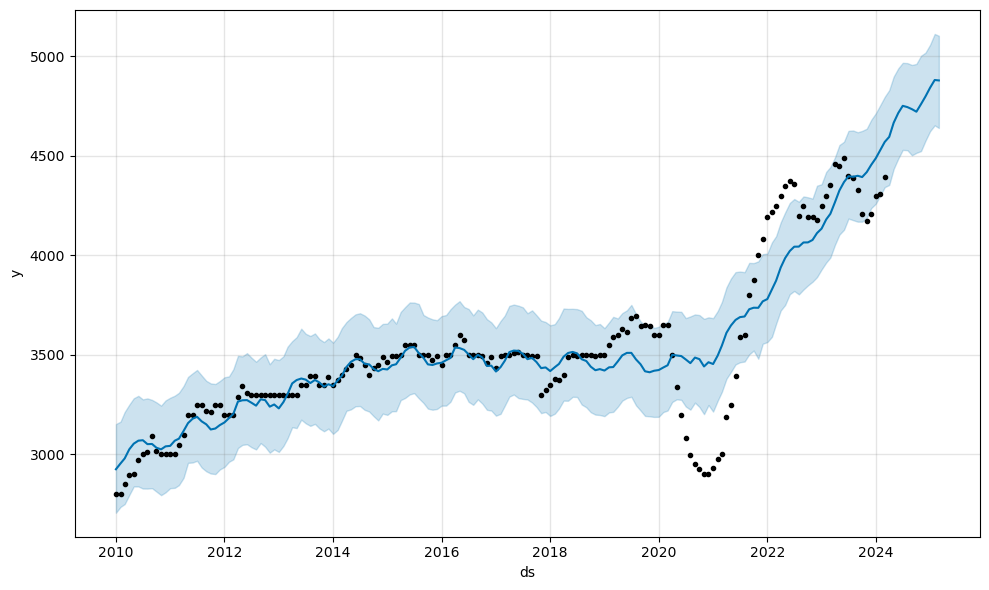

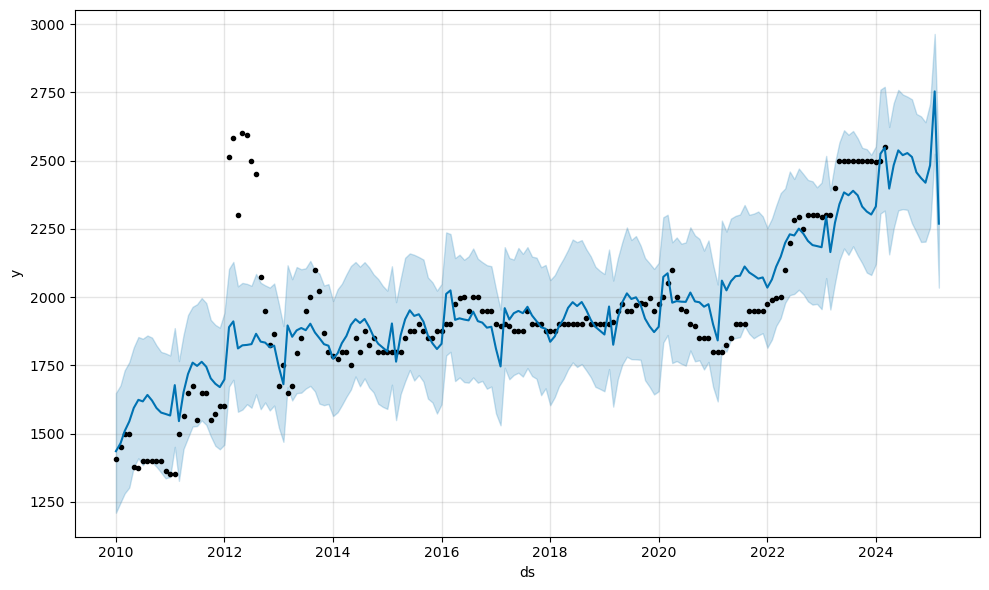

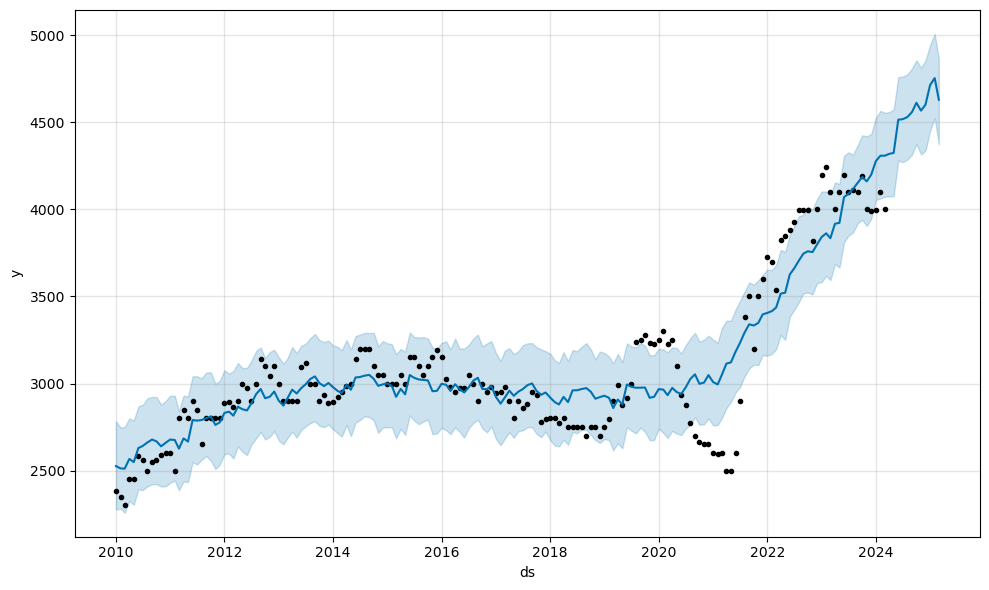

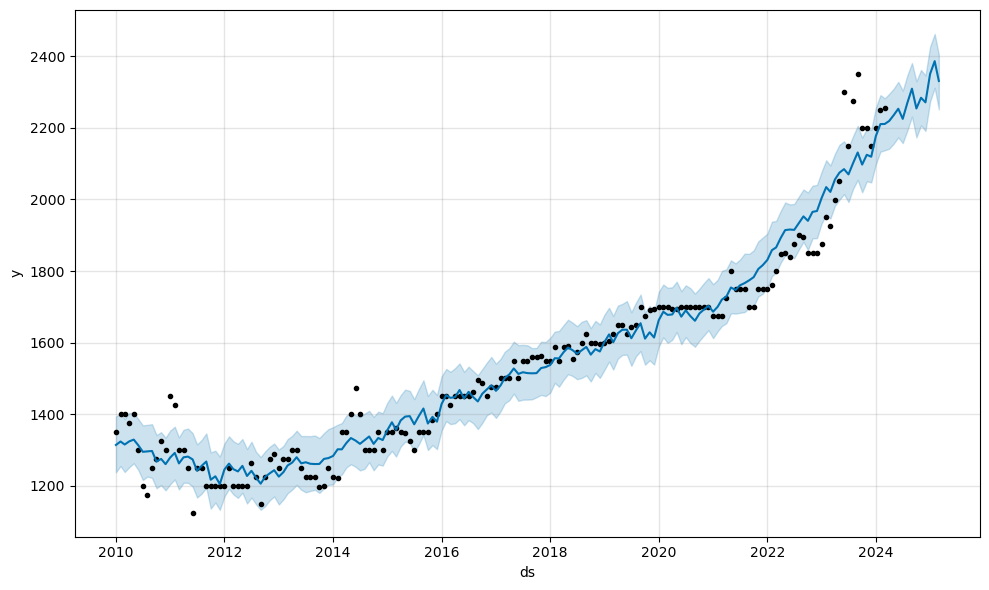

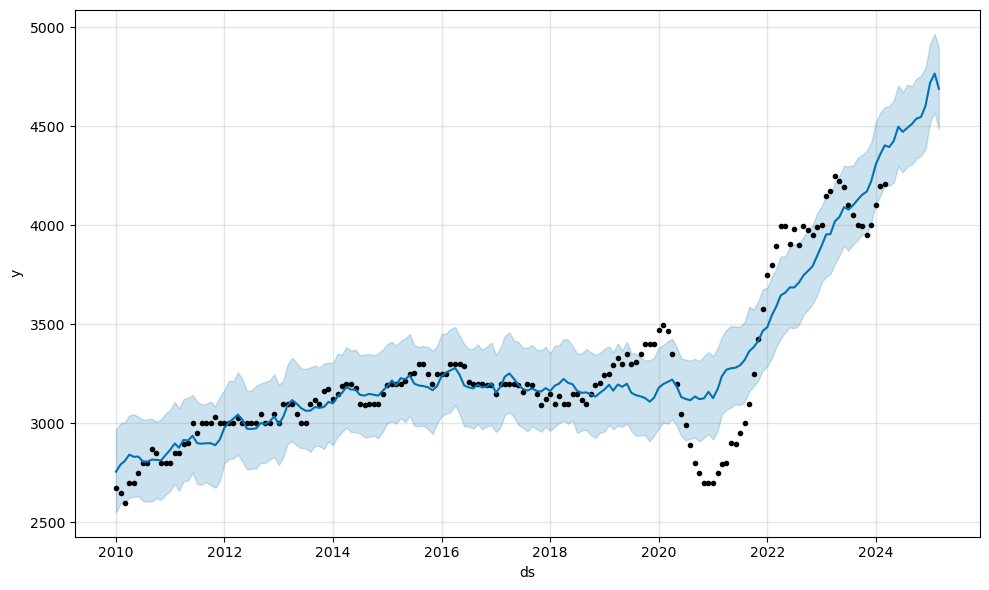

In [22]:
# Plot the Prophet predictions
for i in range(len(list_df)):
    print(f'{selected_boroughs[i]}-{selected_areas[i]}')
    display(m[i].plot(forecast[i]))

Manhattan-All Downtown


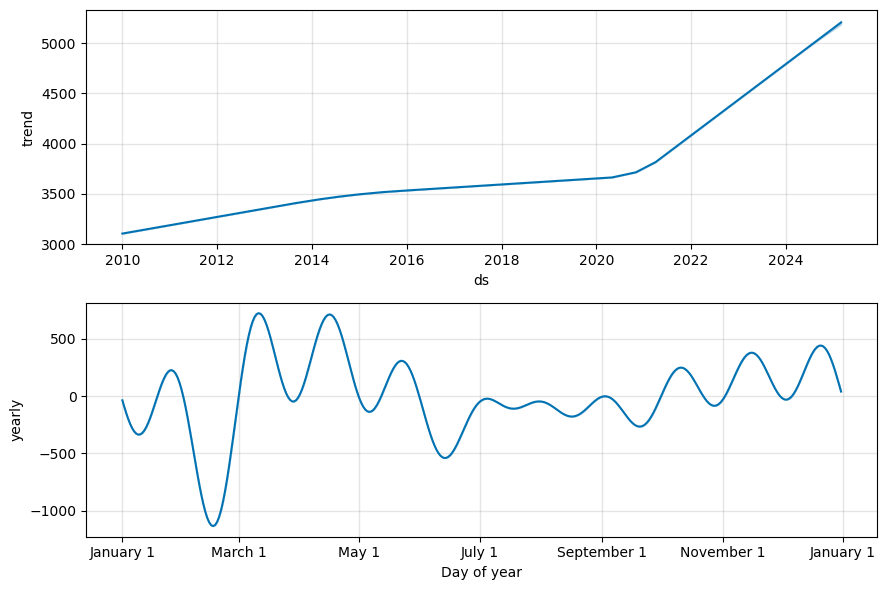

Manhattan-All Midtown


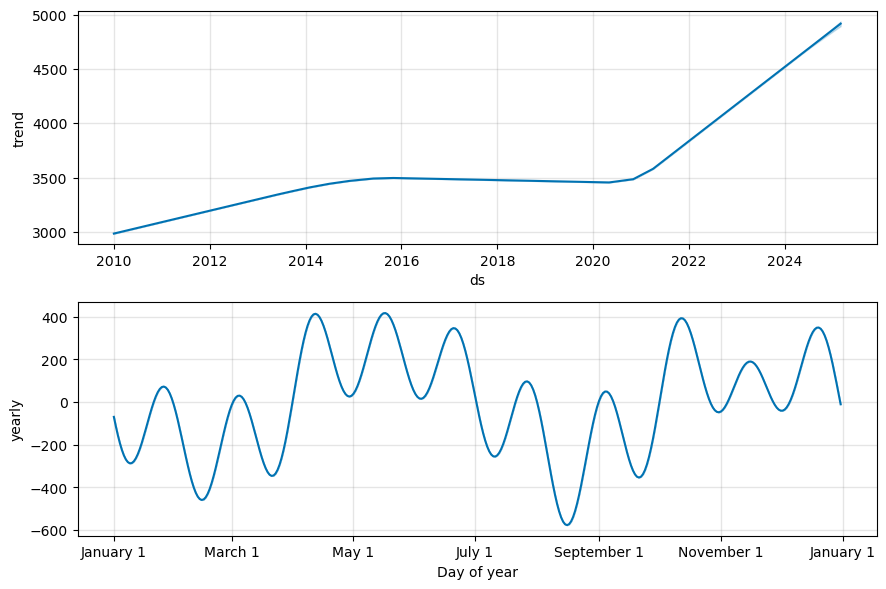

Queens-Queens


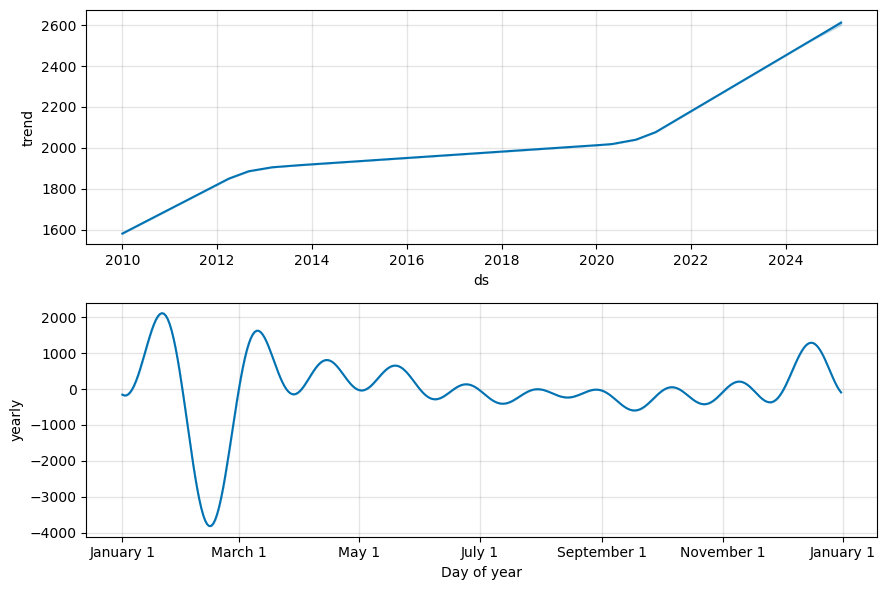

Brooklyn-Williamsburg


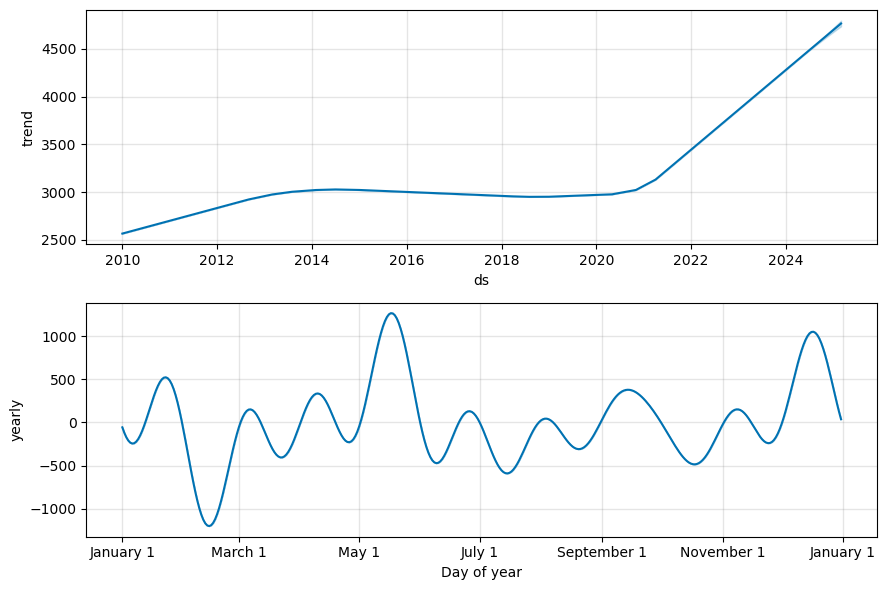

Bronx-Bronx


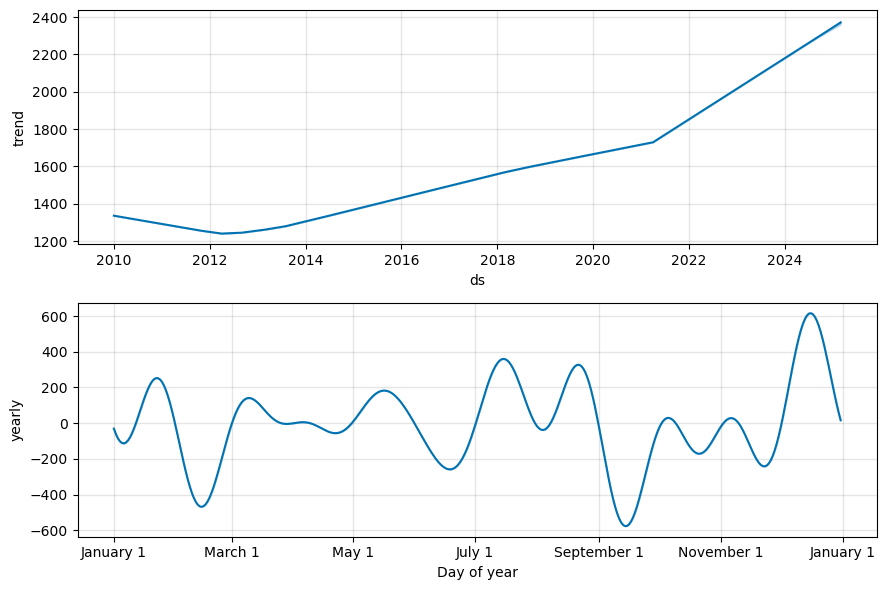

Manhattan-Manhattan


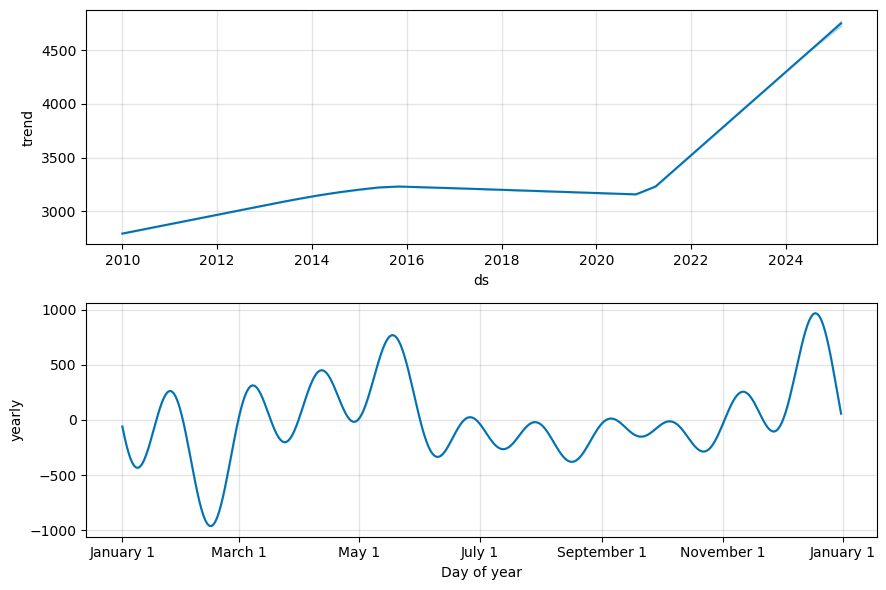

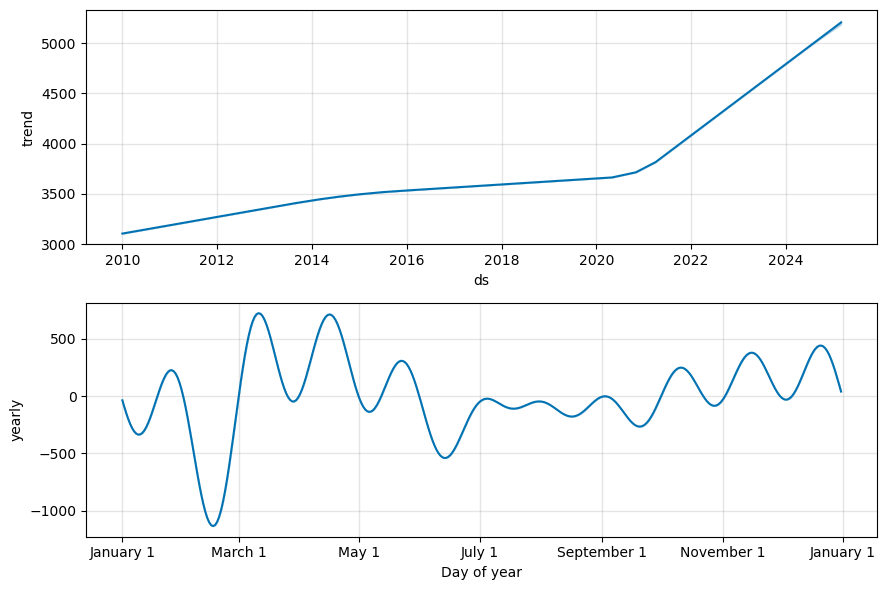

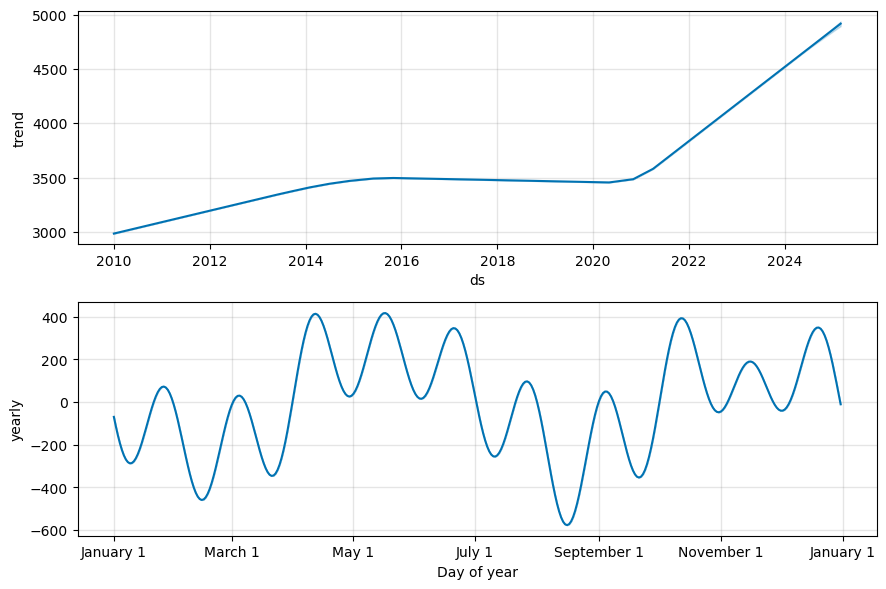

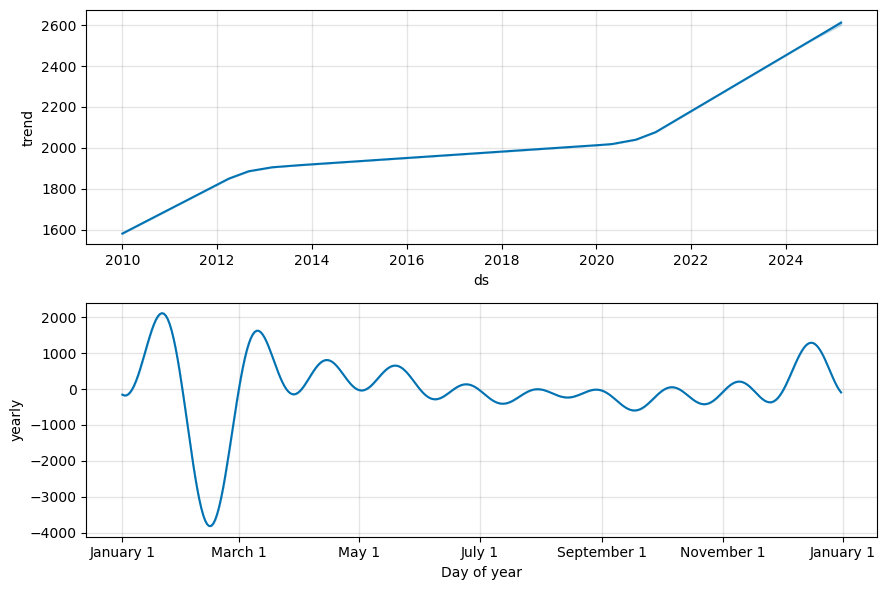

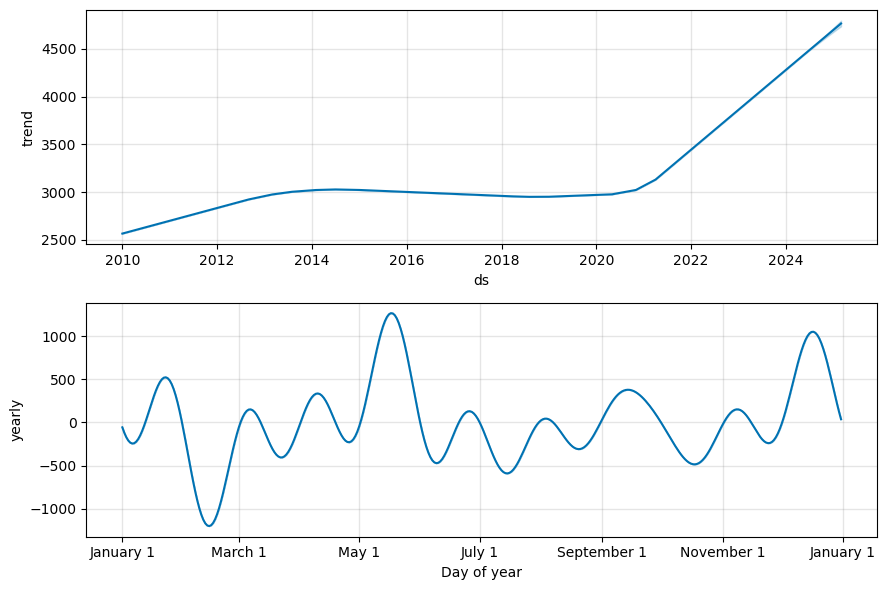

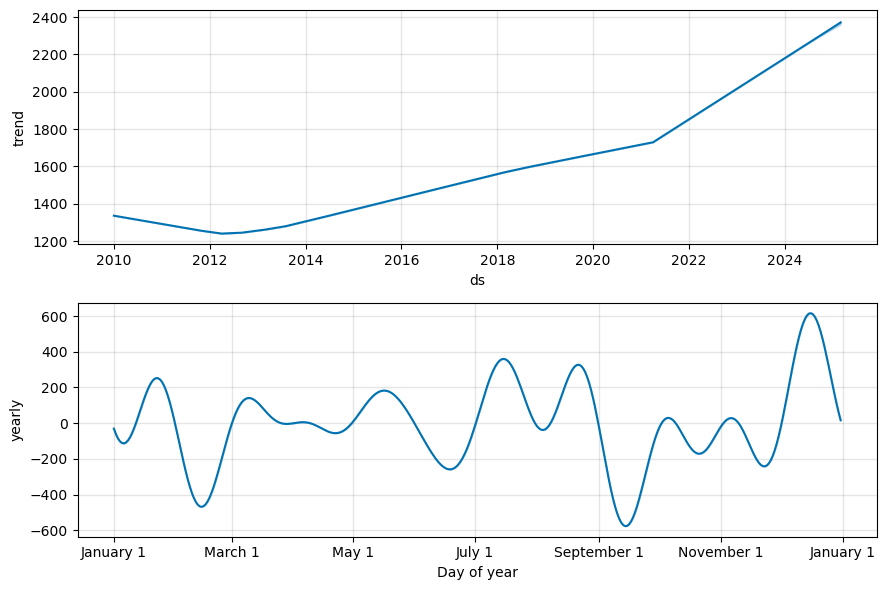

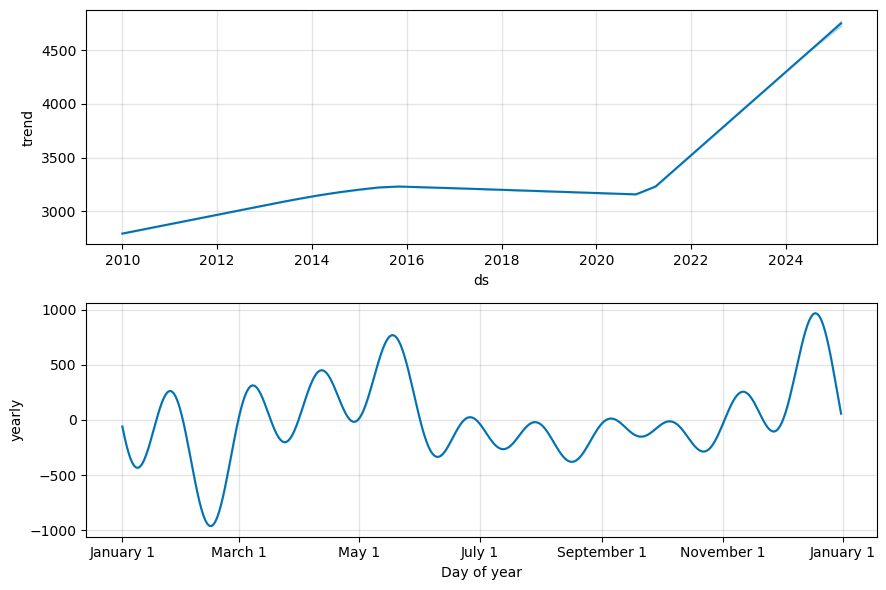

In [23]:
# Plot the components
for i in range(len(list_df)):
    print(f'{selected_boroughs[i]}-{selected_areas[i]}')
    display(m[i].plot_components(forecast[i]))

In [24]:
# Set the index in the forecast DataFrame to the ds datetime column
for i in range(len(list_df)):
    forecast[i] = forecast[i].set_index('ds')
# Check to see that the index has been set properly
forecast[i].tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2024-10-31,4620.737602,4350.745740,4754.751182,4608.056604,4633.049229,-74.008443,-74.008443,-74.008443,-74.008443,-74.008443,-74.008443,0.0,0.0,0.0,4546.729158
2024-11-30,4652.584896,4384.006098,4794.780733,4636.745350,4667.843277,-50.818590,-50.818590,-50.818590,-50.818590,-50.818590,-50.818590,0.0,0.0,0.0,4601.766306
2024-12-31,4685.493767,4518.990826,4915.947385,4667.197038,4704.012083,33.091313,33.091313,33.091313,33.091313,33.091313,33.091313,0.0,0.0,0.0,4718.585080
2025-01-31,4718.402638,4567.979398,4965.396773,4696.994029,4740.303627,47.097486,47.097486,47.097486,47.097486,47.097486,47.097486,0.0,0.0,0.0,4765.500125
2025-02-28,4748.126780,4483.757069,4896.485710,4723.915351,4772.974245,-59.741992,-59.741992,-59.741992,-59.741992,-59.741992,-59.741992,0.0,0.0,0.0,4688.384788


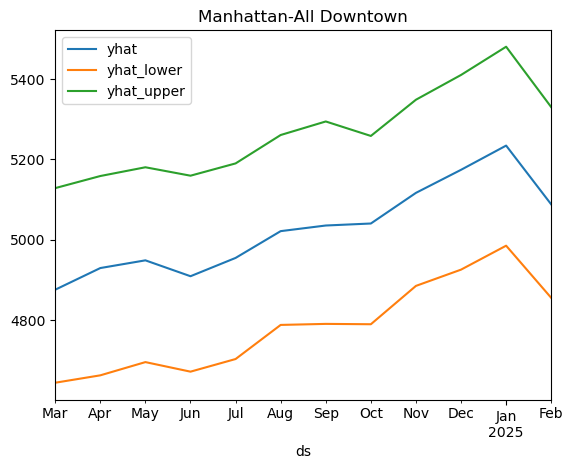

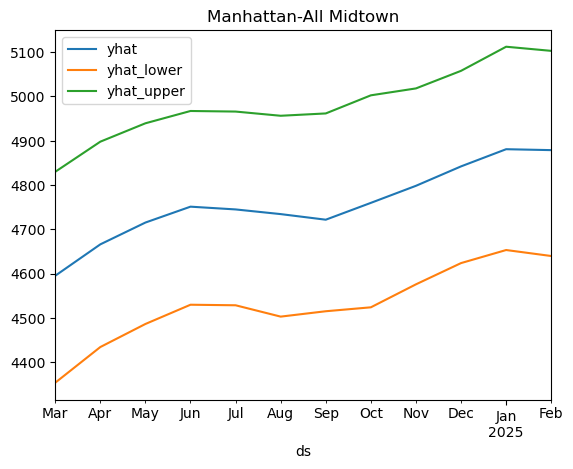

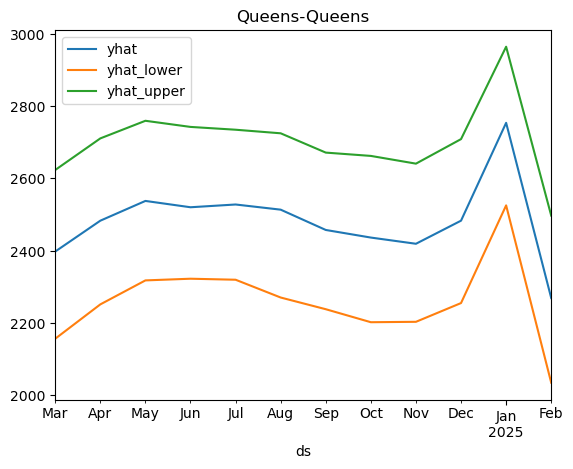

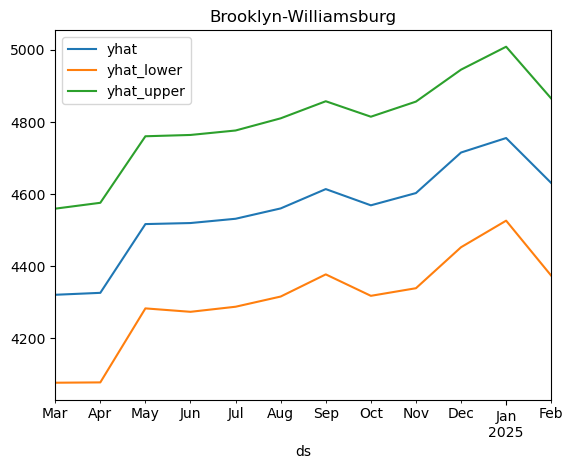

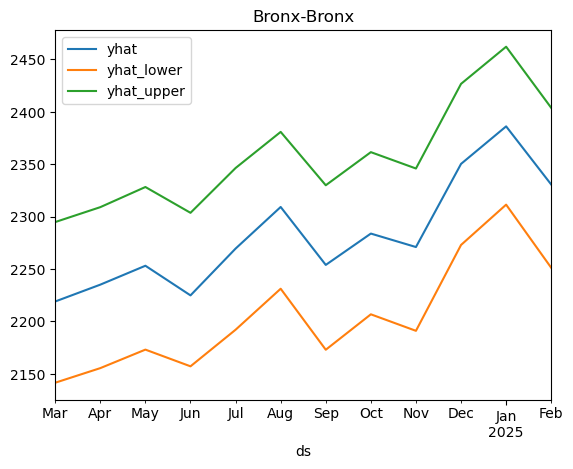

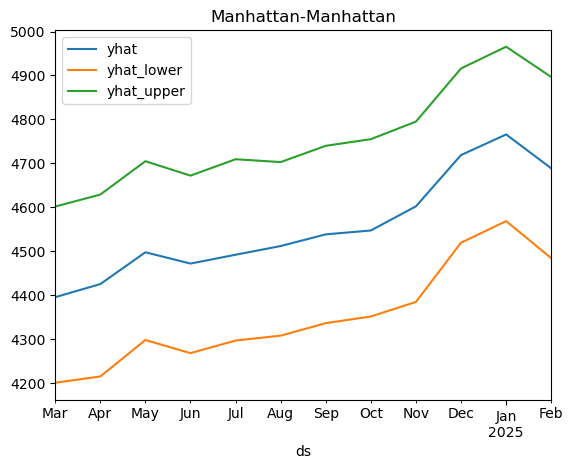

In [25]:
# Plot predictions of our forecast for the 12 month period
for i in range(len(list_df)):
    forecast[i][['yhat', 'yhat_lower', 'yhat_upper']].iloc[-12:,:].plot(title=f'{selected_boroughs[i]}-{selected_areas[i]}')

In [26]:
# Check if there are any correlations in the rents for the areas selected
df_nyc.set_index('index').corr()

,All Downtown,All Midtown,Queens,Williamsburg,Bronx,Manhattan
,,,,,,
All Downtown,1.000000,0.977019,0.699260,0.925121,0.807825,0.968616
All Midtown,0.977019,1.000000,0.711388,0.932389,0.737489,0.971172
Queens,0.699260,0.711388,1.000000,0.732861,0.597139,0.715771
Williamsburg,0.925121,0.932389,0.732861,1.000000,0.697439,0.940949
Bronx,0.807825,0.737489,0.597139,0.697439,1.000000,0.743062
Manhattan,0.968616,0.971172,0.715771,0.940949,0.743062,1.000000
